In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("/hpc/group/igvf/revathy/models/K562/uncertainty/test.txt", sep="\t")
df


,idx,true,mu_pred,sigma
0,1,0.863965,-0.042612,0.834877
1,2,0.024693,-0.159282,0.693147
2,3,-0.081493,-0.190230,0.693147
3,4,-0.023867,-0.166529,0.693147
4,5,-0.005277,-0.177726,0.693147
...,...,...,...,...
994,995,0.385262,-0.101613,0.693147
995,996,0.358212,-0.092872,0.693147
996,997,0.719697,0.068555,0.837194
997,998,0.102415,0.039432,0.814884


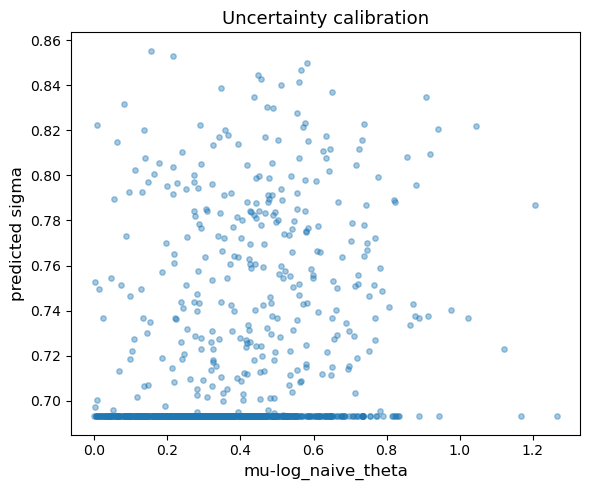

Correlation between |μ − log θnaive| and σ = 0.245


In [7]:

df["abs_error"] = np.abs(df["mu_pred"] - df["true"])  # true already log(theta_naive)
x = df["abs_error"]
y = df["sigma"]

# Scatter plot
plt.figure(figsize=(6,5))
plt.scatter(x, y, alpha=0.4, s=15)
plt.xlabel("mu-log_naive_theta", fontsize=12)
plt.ylabel("predicted sigma", fontsize=12)
plt.title("Uncertainty calibration", fontsize=13)
# plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Optional: compute correlation
corr = np.corrcoef(x, y)[0, 1]
print(f"Correlation between |μ − log θnaive| and σ = {corr:.3f}")

#### Loss comparison for the uncertainty models

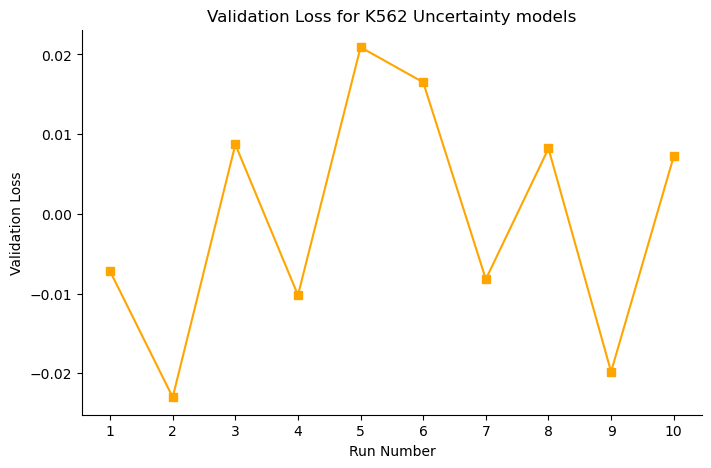

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_Uncertainty_*.out")
files = glob.glob(pattern)

DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_Uncertainty_(\d+)", filename)
    if not match:
        continue

    run_num = int(match.group(1))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                mse_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    DMSO[run_num] = mse
                break

DMSO = dict(sorted(DMSO.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(DMSO.keys()), list(DMSO.values()), marker='s', color='orange')
plt.title("Validation Loss for K562 Uncertainty models")
plt.xlabel("Run Number")
plt.ylabel("Validation Loss")
plt.xticks(sorted(DMSO.keys()))
# plt.legend()
sns.despine()
plt.show()


In [2]:
import numpy as np
import pandas as pd

model2 = pd.read_csv('/hpc/home/rv103/igvf/revathy/models/K562/uncertainty/K562_Uncertainty-2.txt', sep='\t')
sigma = model2["sigma"].to_numpy()
z = (model2["true"] - model2["mu_pred"]) / sigma
print("sigma: median=", np.median(sigma), "p10=", np.percentile(sigma,10), "p90=", np.percentile(sigma,90))
print("z: mean=", np.mean(z), "std=", np.std(z))


sigma: median= 0.21251819 p10= 0.175331434 p90= 0.299182704
z: mean= -4.818318908627069 std= 1.2479490331511967


In [3]:
model2["abs_error"] = np.abs(model2["mu_pred"] - model2["true"])  
x = model2["abs_error"]
y = model2["sigma"]

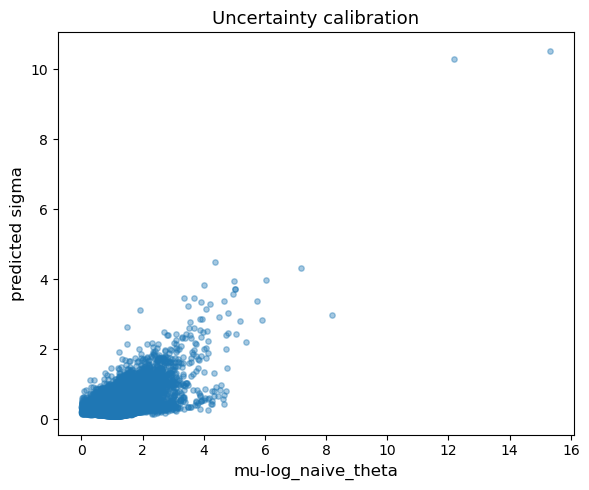

Correlation between |μ − log θnaive| and σ = 0.377


In [4]:
# Scatter plot
plt.figure(figsize=(6,5))
plt.scatter(x, y, alpha=0.4, s=15)
plt.xlabel("mu-log_naive_theta", fontsize=12)
plt.ylabel("predicted sigma", fontsize=12)
plt.title("Uncertainty calibration", fontsize=13)
# plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Optional: compute correlation
corr = np.corrcoef(x, y)[0, 1]
print(f"Correlation between |μ − log θnaive| and σ = {corr:.3f}")

In [5]:
from scipy.stats import pearsonr, spearmanr

x = model2["abs_error"]
y = model2["sigma"]

r, p1 = pearsonr(x, y)
rho, p2 = spearmanr(x, y)

print(f"Pearson r = {r:.3f}, p = {p1:.2e}")
print(f"Spearman ρ = {rho:.3f}, p = {p2:.2e}")


Pearson r = 0.377, p = 0.00e+00
Spearman ρ = 0.147, p = 0.00e+00


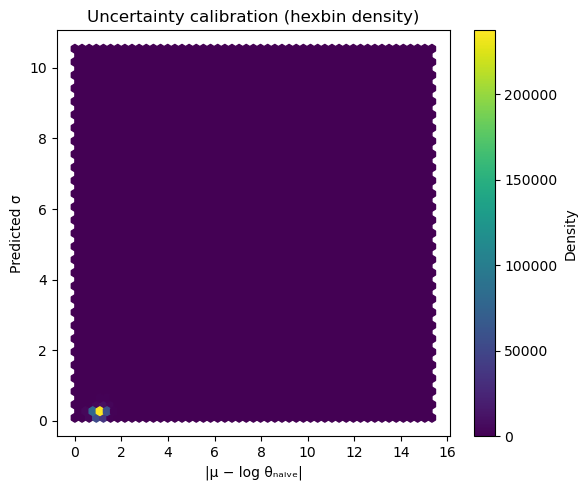

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.hexbin(model2["abs_error"], model2["sigma"], gridsize=50, cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel("|μ − log θₙₐᵢᵥₑ|")
plt.ylabel("Predicted σ")
plt.title("Uncertainty calibration (hexbin density)")
plt.tight_layout()
plt.show()


ValueError: Contour levels must be increasing

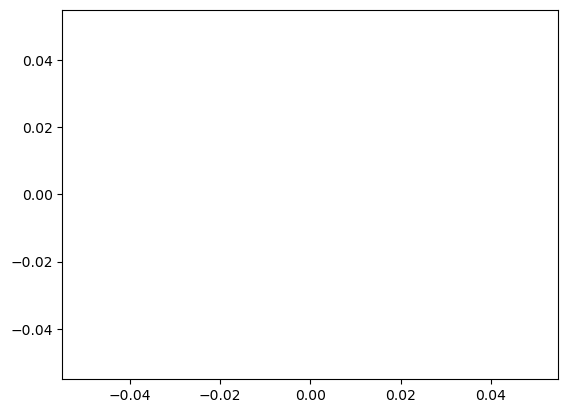

In [7]:
import seaborn as sns

sns.kdeplot(
    x=model2["abs_error"],
    y=model2["sigma"],
    fill=True, cmap="viridis", thresh=0.05, levels=100
)
plt.xlabel("|μ − log θₙₐᵢᵥₑ|")
plt.ylabel("Predicted σ")
plt.title("Uncertainty calibration (2D density)")
plt.show()


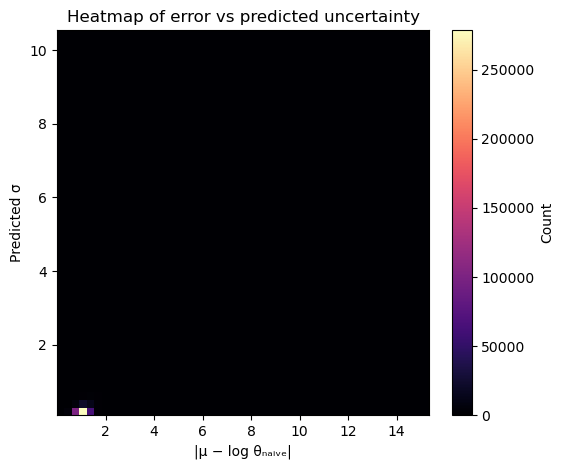

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.hist2d(model2["abs_error"], model2["sigma"], bins=50, cmap='magma')
plt.colorbar(label='Count')
plt.xlabel("|μ − log θₙₐᵢᵥₑ|")
plt.ylabel("Predicted σ")
plt.title("Heatmap of error vs predicted uncertainty")
plt.show()
